<img src='logo_ucm.png' width='200'/>

# <center>PROYECTO MACHINE LEARNING AIRBNB</center>

**PARTICIPANTES:**

PROYECTO MACHINE LEARNING AIRBNB
PARTICIPANTES:

BRYAM DAVID CHAMBA JARAMILLO

ALVAR YEBEL DE BLAS FERNÁNDEZ

MARÍA GARCÍA RODRIGUEZ

MANUEL GRAU ROLDÁN

ÁLVARO MARTÍN LÓPEZ

LUIS JAVIER NATES ARECHAVALETA

In [1]:
import funciones_auxiliares 
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
import datetime

#Estadística
from scipy import stats
from scipy.stats import norm
import inspect

#Aprendizaje automático
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [2]:
data = pd.read_csv('airbnb-listings-extract.csv', sep=';', error_bad_lines=False)

C:\Users\lolo\AppData\Local\Temp/ipykernel_11424/828998556.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('airbnb-listings-extract.csv', sep=';', error_bad_lines=False)


In [3]:
N=data.shape[0]
N

14780

In [4]:
data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,...,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,...,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,...,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [5]:
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


Dado que Geolocalitation tiene latitud y logitud crearemos una nueva variable en la que será la multiplicacion entre latitud y longitud , de tal forma reducimos las variables y las casas que esten cerca tendrán valores similares

In [6]:
data['Geolocation']=data['Latitude']*data['Longitude']

Antes de eliminar nada primero veremos que variables son categoricas viendo cuánto se repiten y viendo cómo son.

In [7]:
for i in data.columns:
    n = len(pd.unique(data[i]))
    print("No.of.unique values of '"+i+"':", n)

No.of.unique values of 'ID': 14780
No.of.unique values of 'Listing Url': 14780
No.of.unique values of 'Scrape ID': 38
No.of.unique values of 'Last Scraped': 37
No.of.unique values of 'Name': 14376
No.of.unique values of 'Summary': 13290
No.of.unique values of 'Space': 10175
No.of.unique values of 'Description': 14282
No.of.unique values of 'Experiences Offered': 5
No.of.unique values of 'Neighborhood Overview': 7913
No.of.unique values of 'Notes': 4653
No.of.unique values of 'Transit': 7840
No.of.unique values of 'Access': 7129
No.of.unique values of 'Interaction': 6586
No.of.unique values of 'House Rules': 8031
No.of.unique values of 'Thumbnail Url': 11958
No.of.unique values of 'Medium Url': 11958
No.of.unique values of 'Picture Url': 14758
No.of.unique values of 'XL Picture Url': 11958
No.of.unique values of 'Host ID': 8935
No.of.unique values of 'Host URL': 8935
No.of.unique values of 'Host Name': 3277
No.of.unique values of 'Host Since': 2117
No.of.unique values of 'Host Location'

La variable regresora que queremos obtener será el precio.

In [8]:
y = data['Price']

Escogemos las variables con las que nos quedamos, algunas variables las eliminamos por ser muy parecidas, otras por no aportar información del problema y otras como 'Monthly Price' por ser hasta cierto punto lo que queremos obtener.

In [9]:
data=data[['Host Since','Host Response Rate','Host Acceptance Rate',
            'Host Listings Count','Host Total Listings Count',
            'Host Verifications','Market','Property Type','Room Type',
            'Accommodates','Bathrooms','Bedrooms','Beds','Bed Type',
            'Amenities','Square Feet',
            'Cleaning Fee','Guests Included','Extra People','Minimum Nights',
            'Maximum Nights','Availability 365','Number of Reviews',
            'Review Scores Rating','License','Cancellation Policy',
             'Calculated host listings count','Reviews per Month','Geolocation',
             'Features']
            ]

Transformar license a dicotomica, Host since a numerica, host verification y features a diferentes dicotomicas

In [10]:
data.shape

(14780, 30)

data = data.drop(['Listing Url', 'Name','Scrape ID', 'Last Scraped','Summary','Space','Description','Thumbnail Url',
                  'Medium Url','Picture Url','XL Picture Url','Thumbnail Url','Host Thumbnail Url', 'Host Location',
                  'Geolocation','Features','Host URL', 'Host Picture Url','Host Name','First Review', 'Last Review','Host Verifications'], axis = 1)
#

Podemos eliminar también algunas de las referencias a la localización de los airbnb, ya que son datos redundantes y con la longitud y la latitud, en principio, puede valernos

data = data.drop(['Zipcode','Street', 'Neighbourhood Group Cleansed', 'City', 'State', 'Market', 'Smart Location',
                  'Country Code', 'Country','Host Neighbourhood'], axis=1)

In [11]:
data.head()

,Host Since,Host Response Rate,Host Acceptance Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Market,Property Type,Room Type,Accommodates,...,Maximum Nights,Availability 365,Number of Reviews,Review Scores Rating,License,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,2016-02-11,100.0,NaN,1.0,1.0,"email,phone,reviews,kba",Austin,Loft,Entire home/apt,2,...,1125,281,42,98.0,NaN,moderate,1.0,3.50,-2968.913547,"Host Is Superhost,Host Has Profile Pic,Host Id..."
1,2016-11-08,100.0,NaN,162.0,162.0,"email,phone,reviews,work_email",Barcelona,Apartment,Entire home/apt,4,...,1125,309,1,80.0,HUTB-006721,super_strict_30,106.0,0.86,89.924278,"Host Has Profile Pic,Requires License,Instant ..."
2,2016-11-08,100.0,NaN,162.0,162.0,"email,phone,reviews,work_email",Barcelona,Apartment,Entire home/apt,4,...,1125,291,0,NaN,HUTB-007527,super_strict_30,106.0,NaN,89.498913,"Host Has Profile Pic,Requires License,Instant ..."
3,2010-05-25,100.0,NaN,27.0,27.0,"email,phone,facebook,reviews,manual_offline,ju...",Barcelona,Apartment,Entire home/apt,8,...,1125,316,13,92.0,NaN,strict,24.0,1.09,89.724523,"Host Has Profile Pic,Host Identity Verified,Re..."
4,2016-01-12,99.0,NaN,207.0,207.0,"email,phone,reviews,jumio",Barcelona,Apartment,Entire home/apt,5,...,1125,7,0,NaN,NaN,flexible,92.0,NaN,89.198810,"Host Has Profile Pic,Host Identity Verified,Is..."


In [12]:
data.dtypes

Host Since                         object
Host Response Rate                float64
Host Acceptance Rate               object
Host Listings Count               float64
Host Total Listings Count         float64
Host Verifications                 object
Market                             object
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                           object
Amenities                          object
Square Feet                       float64
Cleaning Fee                      float64
Guests Included                     int64
Extra People                        int64
Minimum Nights                      int64
Maximum Nights                      int64
Availability 365                    int64
Number of Reviews                   int64
Review Scores Rating              

-No.of.unique values of ID: 14780 
-No.of.unique values of Listing Url: 14780
-No.of.unique values of Scrape ID: 38
-No.of.unique values of Last Scraped: 37
-No.of.unique values of Name: 14376
-No.of.unique values of Summary: 13290
+No.of.unique values of Space: 10175
-No.of.unique values of Description: 14282
-No.of.unique values of Experiences Offered: 5
-No.of.unique values of Neighborhood Overview: 7913
-No.of.unique values of Notes: 4653
-No.of.unique values of Transit: 7840
-No.of.unique values of Access: 7129
-No.of.unique values of Interaction: 6586
-No.of.unique values of House Rules: 8031
-No.of.unique values of Thumbnail Url: 11958
-No.of.unique values of Medium Url: 11958
-No.of.unique values of Picture Url: 14758
-No.of.unique values of XL Picture Url: 11958
-No.of.unique values of Host ID: 8935
-No.of.unique values of Host URL: 8935
-No.of.unique values of Host Name: 3277
+No.of.unique values of Host Since: 2117
-No.of.unique values of Host Location: 569
-No.of.unique values of Host About: 5008
+No.of.unique values of Host Response Time: 5
+No.of.unique values of Host Response Rate: 71
+No.of.unique values of Host Acceptance Rate: 13
-No.of.unique values of Host Thumbnail Url: 8894
-No.of.unique values of Host Picture Url: 8894
-No.of.unique values of Host Neighbourhood: 396
+No.of.unique values of Host Listings Count: 57
+No.of.unique values of Host Total Listings Count: 57
alterar No.of.unique values of Host Verifications: 207
-No.of.unique values of Street: 1646
-No.of.unique values of Neighbourhood: 391
-No.of.unique values of Neighbourhood Cleansed: 478
-No.of.unique values of Neighbourhood Group Cleansed: 50
-No.of.unique values of City: 247
-No.of.unique values of State: 103
-No.of.unique values of Zipcode: 620
+No.of.unique values of Market: 44
-No.of.unique values of Smart Location: 257
-No.of.unique values of Country Code: 18
-No.of.unique values of Country: 18
-No.of.unique values of Latitude: 14780
-No.of.unique values of Longitude: 14780
+No.of.unique values of Property Type: 22
+No.of.unique values of Room Type: 3
+No.of.unique values of Accommodates: 16
+No.of.unique values of Bathrooms: 18
+No.of.unique values of Bedrooms: 11
+No.of.unique values of Beds: 17
+No.of.unique values of Bed Type: 5
alterar No.of.unique values of Amenities: 12380
+No.of.unique values of Square Feet: 104
variable regresora No.of.unique values of Price: 371
-eliminada porque es  parecido a lo que queremos predecir No.of.unique values of Weekly Price: 389
-idem No.of.unique values of Monthly Price: 587
-idem No.of.unique values of Security Deposit: 125
+No.of.unique values of Cleaning Fee: 112 set na to 0
+No.of.unique values of Guests Included: 15
+No.of.unique values of Extra People: 68
+No.of.unique values of Minimum Nights: 43
+No.of.unique values of Maximum Nights: 173
No.of.unique values of Calendar Updated: 57
+No.of.unique values of Has Availability: 2
+No.of.unique values of Availability 30: 31
+No.of.unique values of Availability 60: 61
+No.of.unique values of Availability 90: 91
+No.of.unique values of Availability 365: 366
No.of.unique values of Calendar last Scraped: 38
+No.of.unique values of Number of Reviews: 263
-No.of.unique values of First Review: 1680
-No.of.unique values of Last Review: 786
+No.of.unique values of Review Scores Rating: 55
-No.of.unique values of Review Scores Accuracy: 10
-No.of.unique values of Review Scores Cleanliness: 10
-No.of.unique values of Review Scores Checkin: 10
-No.of.unique values of Review Scores Communication: 9
-No.of.unique values of Review Scores Location: 9
-No.of.unique values of Review Scores Value: 10
+No.of.unique values of License: 317 transformar a dicotómica
-No.of.unique values of Jurisdiction Names: 13
+No.of.unique values of Cancellation Policy: 8
+No.of.unique values of Calculated host listings count: 46
+No.of.unique values of Reviews per Month: 842
No.of.unique values of Geolocation: 14780
transformar No.of.unique values of Features: 89

Variable a predecir, la llamaremos y para realizar luego la regresión sobre ella

Creamos listas que contentga los nombres de las variables a estudiar dependiendo su tipo

In [124]:
def str_to_dataframe(data,column):
    datos=[]
    for i in data[column]:
        if type(i)== float:#si es np.nan creamos una lista vacia
            lista={}
        else:#en caso contrario creamos una lista separada
            aux =i.split(',')
            lista={}
            for j in aux:
                lista[j]=True
        datos.append(lista)
    return(pd.DataFrame(datos).fillna(False))
    

Dado que nos saldrán muchas variables usaremos el Clustering Jerárquico , que funciona bien con las variables dicotómicas, para transformarlo a una variable categórica, la idea es, una casa lujosa tendrá mas o menos los mismos amenities por lo que pertenecerá al cluster de casas lujosas, igual con las menos lujosas, etc.

In [125]:
str_to_dataframe(data,'Host Verifications')

,email,phone,reviews,kba,work_email,facebook,manual_offline,jumio,linkedin,government_id,google,offline_government_id,selfie,identity_manual,manual_online,sent_id,photographer,amex,None,weibo
0,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,True,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
14776,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14777,True,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
14778,True,True,True,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False


In [126]:
str_to_dataframe(data,'Features')

,Host Is Superhost,Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License,Instant Bookable,Require Guest Phone Verification,Require Guest Profile Picture
0,True,True,True,True,False,False,False,False
1,False,True,False,False,True,True,False,False
2,False,True,False,False,True,True,False,False
3,False,True,True,False,True,True,False,False
4,False,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...
14775,True,True,True,True,False,False,False,False
14776,False,True,False,True,False,True,False,False
14777,True,True,True,False,False,False,False,False
14778,False,True,True,True,False,False,False,False


In [123]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(str_to_dataframe(data,'Features'))
pca.get_params()
print(pca.explained_variance_ratio_)

[0.28286157 0.24943916 0.23871475 0.10971056 0.05305792 0.05117423
 0.01122943 0.00381237]


In [106]:
data.join(str_to_dataframe(data,'Amenities'))

,Host Since,Host Response Rate,Host Acceptance Rate,Host Listings Count,Host Verifications,Market,Property Type,Room Type,Accommodates,Bathrooms,...,Babysitter recommendations,Elevator in Building,Air Conditioning,Smoking Allowed,Hot Tub,Changing table,EV charger,BBQ grill,Wheelchair Accessible,Fireplace guards
0,2016-02-11,100.0,NaN,1.0,"email,phone,reviews,kba",Austin,Loft,Entire home/apt,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-11-08,100.0,NaN,162.0,"email,phone,reviews,work_email",Barcelona,Apartment,Entire home/apt,4,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-11-08,100.0,NaN,162.0,"email,phone,reviews,work_email",Barcelona,Apartment,Entire home/apt,4,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010-05-25,100.0,NaN,27.0,"email,phone,facebook,reviews,manual_offline,ju...",Barcelona,Apartment,Entire home/apt,8,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-01-12,99.0,NaN,207.0,"email,phone,reviews,jumio",Barcelona,Apartment,Entire home/apt,5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,2013-12-18,100.0,NaN,1.0,"email,phone,reviews,jumio",New York,Apartment,Entire home/apt,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14776,2017-03-24,NaN,NaN,1.0,"email,phone",Paris,Bed & Breakfast,Private room,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14777,2015-07-06,100.0,NaN,1.0,"email,phone,reviews,jumio",Paris,Apartment,Entire home/apt,5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14778,2013-03-20,100.0,80%,1.0,"email,phone,facebook,linkedin,reviews,jumio",Denver,Apartment,Entire home/apt,4,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
list_var_continuous = list(data.select_dtypes('float').columns)+list(data.select_dtypes('int').columns)
list_var_discrets = list(data.select_dtypes('O').columns)

Hagamos la matriz de correlación para ver si algunas variables aportan información similar a nuestro modelo de regresión, lo que permitiría eliminar algunas variables

1. Primero rellenemos los valores missing imputándolos por el método KNN Imputer

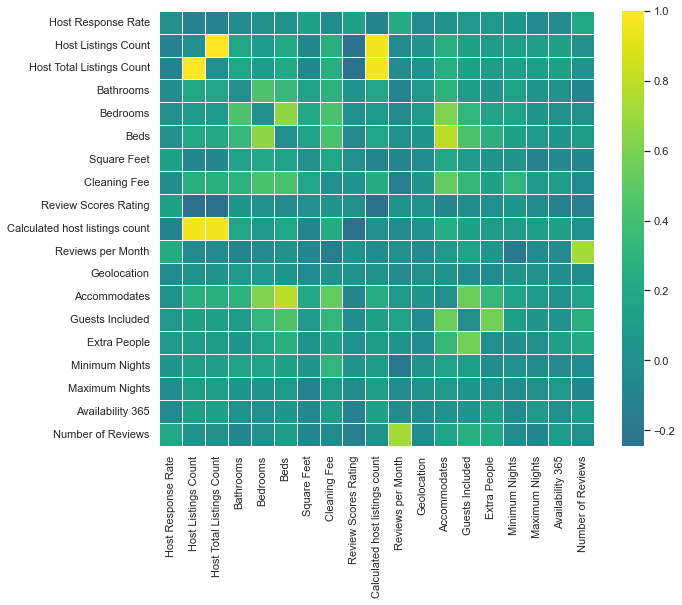

0

In [16]:
funciones_auxiliares.get_corr_matrix(dataset = data[list_var_continuous], metodo='spearman', size_figure=[10,8])

Con un simple análisis cualitativo parece claro que 3 variables (las relacionadas tienen una correlaión perfecta por lo que podemos prescindir e dos de ellas y simplificar algo el modelo

In [18]:
data = data.drop(['Host Total Listings Count', 'Calculated host listings count'], axis = 1)

In [19]:
data.columns

Index(['Host Since', 'Host Response Rate', 'Host Acceptance Rate',
       'Host Listings Count', 'Host Verifications', 'Market', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Bed Type', 'Amenities', 'Square Feet', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Availability 365', 'Number of Reviews', 'Review Scores Rating',
       'License', 'Cancellation Policy', 'Reviews per Month', 'Geolocation',
       'Features'],
      dtype='object')

In [22]:
data.select_dtypes('object').columns

Index(['Host Since', 'Host Acceptance Rate', 'Host Verifications', 'Market',
       'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'License',
       'Cancellation Policy', 'Features'],
      dtype='object')

## Valores missing e imputación

1. Primero las variables continuas

In [19]:
list_var_continuous = list(data.select_dtypes('float').columns)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data[list_var_continuous])
data[list_var_continuous]=imputer.transform(data[list_var_continuous])

2. Comencemos con el tiempo que suele tardar el anfitrión en contestar a los mensajes de los posibles clientes
Utilizaremos los cuantiles para poder distibuir los valores en cuatro categorías

In [20]:
data['Host Response Time'] = data['Host Response Time'].fillna(0)

data['Host Response Time'].value_counts(normalize=True)\
                .mul(100).rename('percent').reset_index() 

,index,percent
0,within an hour,53.484438
1,within a few hours,19.431664
2,0,12.848444
3,within a day,12.192152
4,a few days or more,2.043302


In [21]:
data['Host Response Time'] = data['Host Response Time'].replace({'within an hour': 0.75, 'within a few hours':0.5, 'within a day': 0.25, 'a few days or more': 0.0}).astype('float')

Rellenamos los valores de Host Response Rate

In [22]:
data['Host Response Time'] = data['Host Response Time'].fillna(0)

Póliza de cancelación

In [23]:
data['Cancellation Policy'].value_counts()

strict             5742
flexible           4671
moderate           4248
strict_new           34
super_strict_60      32
moderate_new         20
super_strict_30      19
flexible_new         14
Name: Cancellation Policy, dtype: int64

In [24]:
data['Cancellation Policy'] = data['Cancellation Policy'].replace({'strict': 0.25, 'flexible':0.9, 'moderate': 0.5,
                                                                   'strict_new': 0.25, 'super_strict_60':0, 'super_strict_30':0,
                                                                  'moderate_new':0.5, 'flexible_new': 0.9}).astype('float')

Al estandarizar los datos con la división del X_train y X_test servirán para mejorar el algoritmo

3. El siguiente paso será transformar la fecha desde la que el dueño del airbnb ofrece un alojamiento en días desde esa fecha

In [25]:
fecha = pd.to_datetime(data['Host Since'])
#Creamos una variable que reste la actualidad (3/6/2022) a la fecha del anfitrión 
#Nota para eliminar, esto es igual que en big data
tiempo_anfitrión = (pd.datetime(2022, 6, 3) - fecha).astype('timedelta64[D]')
#Sustituimos por la variable fecha para que sea más sencillo utilizarla a la hora de los modelos 
data['Tiempo Anfitrión Días'] = tiempo_anfitrión
data['Tiempo Anfitrión Días'] = data['Tiempo Anfitrión Días'].fillna(0)

data = data.drop('Host Since',axis = 1)

C:\Users\Luis\AppData\Local\Temp/ipykernel_17000/4719177.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  tiempo_anfitrión = (pd.datetime(2022, 6, 3) - fecha).astype('timedelta64[D]')


Vayamos con el número de comodidades o 'Amenitites'.

Tendremos en cuenta el número a la hora de valorar el precio de un alojamiento

In [26]:
data['Amenities'] = data['Amenities'].fillna(0)

lista = []
amenities = []
i= 0
while i < len(data['Amenities']):
    if type(data['Amenities'][i]) != int:
        juntos =data['Amenities'][i].split(',')
        l = len(data['Amenities'][i].split(','))
        i=i+1
    else:
        i=i+1
    lista.append(l) 
    amenities.append(juntos)
data['nº Amenities'] = lista

Ahora valoraremos las comodidades menos frecuentes para darles un valor extra

In [27]:
dic = {}
for i in range(0,len(amenities)):
    for j in range(0,len(amenities[i])):
        if amenities[i][j] not in dic.keys():
            dic[amenities[i][j]] = 1
        else:
            dic[amenities[i][j]] = dic[amenities[i][j]] +1 


In [28]:
dic_min = {}
dic_exclusive = {}
for i in dic:
    if dic[i] < len(data)/10:
        dic_min[dic[i]] = dic[i]
        if dic[i] <len(data)/50:
            dic_exclusive[dic[i]] = dic[i]

Property Type

In [29]:
data['Property Type'].value_counts()

Apartment             11962
House                  1368
Condominium             363
Bed & Breakfast         353
Loft                    305
Other                   225
Dorm                     44
Guesthouse               42
Chalet                   26
Villa                    19
Townhouse                17
Hostel                   16
Serviced apartment       13
Boutique hotel            6
Boat                      4
Camper/RV                 4
Guest suite               3
Casa particular           3
Earth House               3
Bungalow                  2
Tent                      1
Timeshare                 1
Name: Property Type, dtype: int64

In [30]:
data['Property Type'].replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Guesthouse': 'House',
    'Casa particular': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth House': 'House',
    'Chalet': 'House',
    'Boutique hotel': 'Other',
    'Condominium': 'Other',
    'Bed & Breakfast': 'Other',
    'Dorm': 'Other',
    'Hostel': 'Other',
    'Guest suite': 'Other',
    'Tent': 'Other',
    'Timeshare': 'Other',
    'Boat': 'Other',
    'Camper/RV': 'Other'
    }, inplace=True)


## Distribución de pisos en cuanto al precio (variable a estimar)

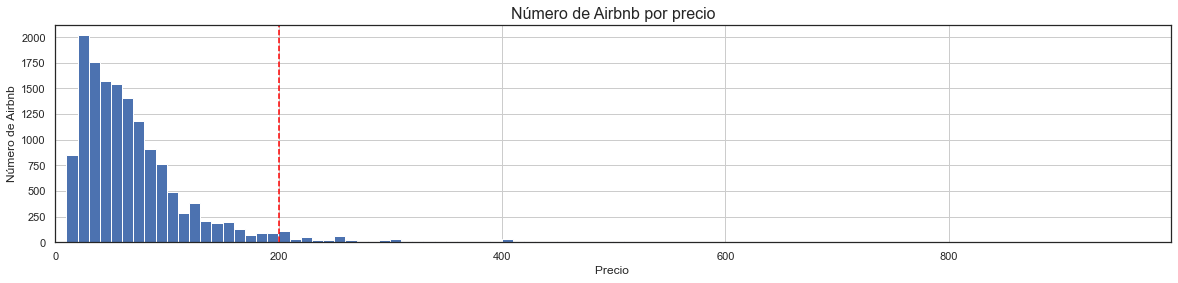

In [31]:

plt.figure(figsize=(20,4))
data['Price'].hist(bins=100, range=(0,max(data['Price'])))
plt.margins(x=0)
plt.axvline(200, color='red', linestyle='--')
plt.title("Número de Airbnb por precio", fontsize=16)
plt.xlabel("Precio ")
plt.ylabel("Número de Airbnb")
plt.show()

La mayor parte de los pisos tiene un precio menor de 200, solo unos pocos tienen un precio por encima de ese valor

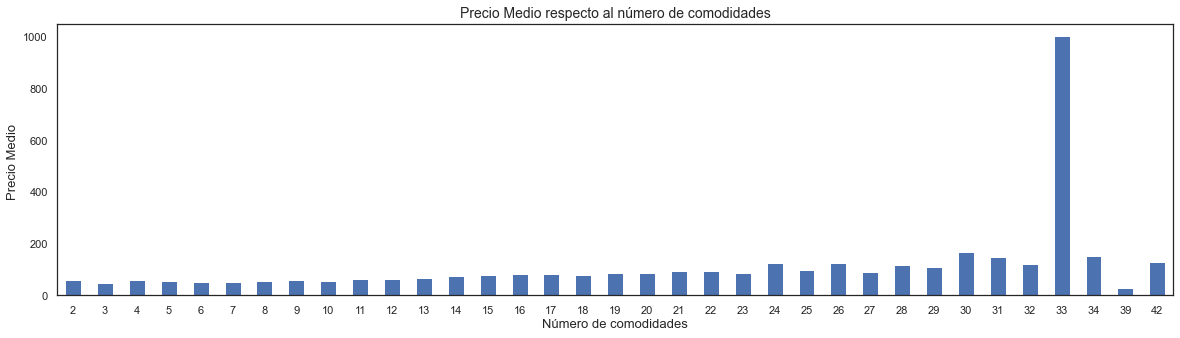

In [32]:
plt.figure(figsize=(20,5))
data.groupby('nº Amenities').Price.mean().plot(kind='bar')
plt.title('Precio Medio respecto al número de comodidades', fontsize=14)
plt.xlabel('Número de comodidades', fontsize=13)
plt.ylabel('Precio Medio ', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

No parece ser un factor muy importante, aunque sí crece poco a poco. el Dato de las 33 es algo completamente aleatorio, es posible que solo haya un dato con 33 'Amenities'